<a href="https://colab.research.google.com/github/andreidore/useless_stuff/blob/master/opencv_green_screen/opencv_green_screen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
!wget https://raw.githubusercontent.com/andreidore/useless_stuff/master/opencv_green_screen/image_0.jpg
!wget https://raw.githubusercontent.com/andreidore/useless_stuff/master/opencv_green_screen/image_1.jpg

--2020-08-19 15:44:47--  https://raw.githubusercontent.com/andreidore/useless_stuff/master/opencv_green_screen/image_0.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5076865 (4.8M) [image/jpeg]
Saving to: ‘image_0.jpg.1’

image_0.jpg.1       100%[===================>]   4.84M  13.7MB/s    in 0.4s    

2020-08-19 15:44:48 (13.7 MB/s) - ‘image_0.jpg.1’ saved [5076865/5076865]

--2020-08-19 15:44:49--  https://raw.githubusercontent.com/andreidore/useless_stuff/master/opencv_green_screen/image_1.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK


In [4]:
image_0=cv2.imread("image_0.jpg")
image_1=cv2.imread("image_1.jpg")
image_0=cv2.cvtColor(image_0,cv2.COLOR_BGR2RGB)
image_1=cv2.cvtColor(image_1,cv2.COLOR_BGR2RGB)

image_leaf=image_1[2400:3100,1100:1700]

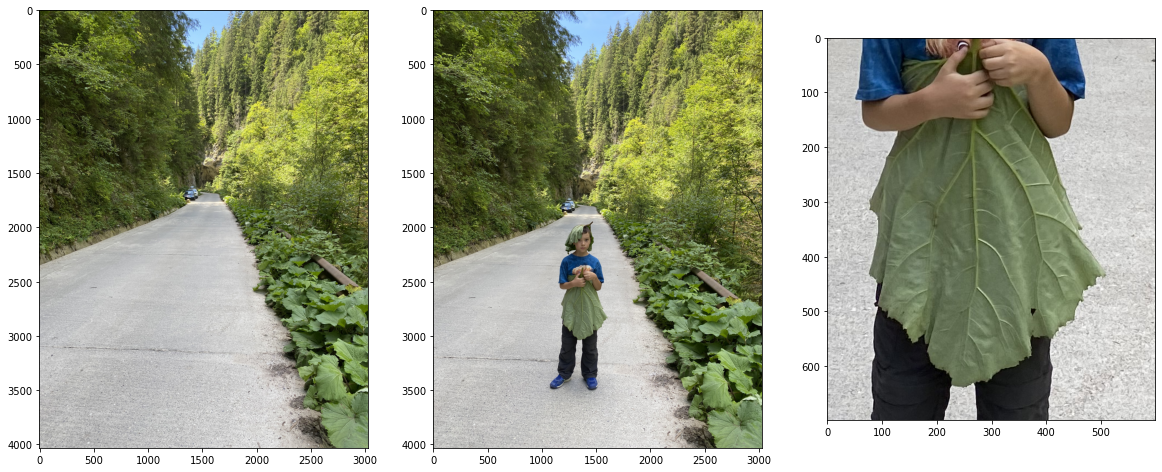

In [5]:
fig=plt.figure(figsize=(20, 20))
fig.add_subplot(1,3, 1) ,plt.imshow(image_0)
fig.add_subplot(1,3, 2) ,plt.imshow(image_1)
fig.add_subplot(1,3, 3),plt.imshow(image_leaf)
plt.show()

# Mask 



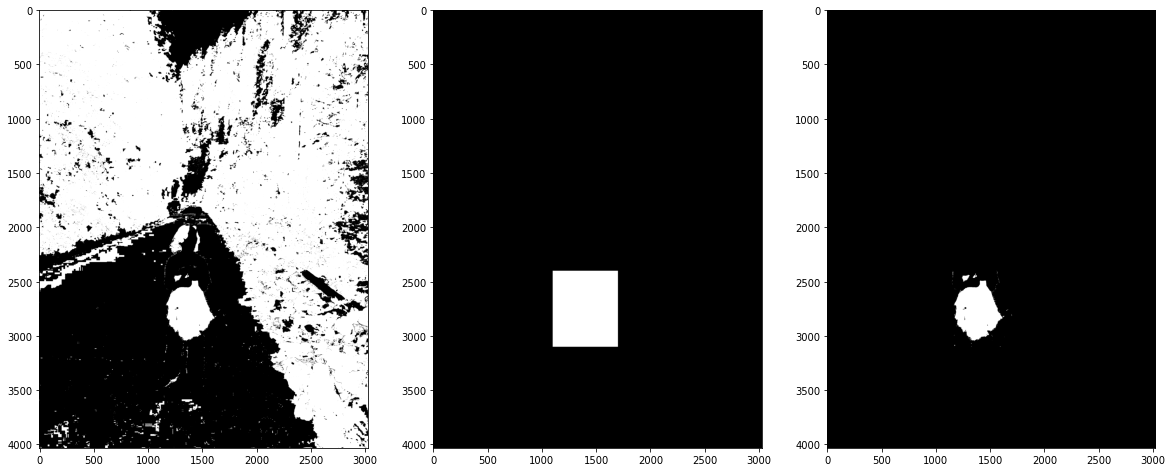

In [22]:
lower = np.array([30,6,6])
upper = np.array([49,255,255])

hsv = cv2.cvtColor(image_1, cv2.COLOR_RGB2HSV)
mask = cv2.inRange(hsv, lower, upper)
mask=mask==255
mask=mask.astype(np.bool)

#print(m)

second_mask=np.zeros(mask.shape,dtype=np.bool)
second_mask[2400:3100,1100:1700]=True

#print(second_mask)

final_mask=np.zeros(mask.shape,dtype=bool)
final_mask[second_mask]=mask[second_mask]

fig=plt.figure(figsize=(20, 20))

fig.add_subplot(1,3, 1), plt.imshow(mask,cmap=plt.cm.gray)
fig.add_subplot(1,3, 2), plt.imshow(second_mask,cmap=plt.cm.gray)
fig.add_subplot(1,3, 3), plt.imshow(final_mask,cmap=plt.cm.gray)

plt.show()




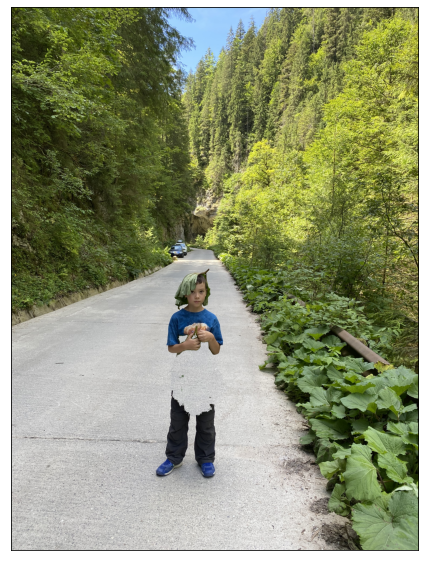

In [27]:
final_image=image_1.copy()
final_image[final_mask]=image_0[final_mask]

#final_image[final_mask]=background_image[final_mask]


figure=plt.figure(figsize=(10,10))
plt.xticks([])
plt.yticks([])
plt.imshow(final_image)

plt.show()
